# Import libraries

In [48]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import keras
import random
from sklearn.metrics import (accuracy_score, roc_curve, auc, roc_auc_score, 
                             classification_report, confusion_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

# Load data

**Kaggle link**: https://www.kaggle.com/datasets/erdemtaha/cancer-data

In [49]:
cancer = pd.read_csv("C:/Users/bonni/Documents/Coding/Projects/Classification/Cancer_Data.csv")
print(cancer.shape)
cancer.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Descriptive statistics

In [50]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# EDA

In [51]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [52]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [53]:
cancer = cancer.drop(['id','Unnamed: 32'], axis=1)
cancer.shape

(569, 31)

# Map binary target

In [54]:
diagnosis = {'M':1, 'B':0}

cancer['diagnosis'] = cancer['diagnosis'].map(diagnosis)

# Separate features and target

In [55]:
X = cancer.drop(['diagnosis'], axis=1)
y = cancer['diagnosis']

# Wrapper method: backward selection

In [56]:
# lists of all features
selected_features = X.columns.tolist()

X = sm.add_constant(X)

while True:
    ols = sm.OLS(y, X[selected_features]).fit()

    max_p = max(ols.pvalues[1:])  # don't include index 0 for constant
    max_p_feature = ols.pvalues[ols.pvalues == max_p].index[0]

    if max_p > 0.05:
        selected_features.remove(max_p_feature)
    else:
        break

print("Selected features:\n", selected_features)

ols = sm.OLS(y, X[selected_features]).fit()

Selected features:
 ['radius_mean', 'area_mean', 'compactness_mean', 'concave points_mean', 'fractal_dimension_mean', 'smoothness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [57]:
X = X.drop([col for col in X.columns if col not in selected_features], axis=1)
X.shape

(569, 14)

# Split train and test data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale specific columns with values over 1

In [59]:
cols_to_standardize = X.loc[:, (X > 1).all()].columns.tolist()
print(cols_to_standardize)

['radius_mean', 'area_mean', 'radius_worst', 'texture_worst', 'area_worst']


In [60]:
scaler = StandardScaler()
X_train[cols_to_standardize] = scaler.fit_transform(X_train[cols_to_standardize])
X_test[cols_to_standardize] = scaler.transform(X_test[cols_to_standardize])

# Check out train and test sets

In [61]:
print(X_train.shape)
X_train.head(3)

(455, 14)


,radius_mean,area_mean,compactness_mean,concave points_mean,fractal_dimension_mean,smoothness_se,concavity_se,concave points_se,radius_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
408,1.044985,0.903128,0.13040,0.088240,0.06069,0.007231,0.025090,0.014800,0.932100,-0.046983,0.754906,0.33010,0.3060,0.08503
4,1.681411,1.746022,0.13280,0.104300,0.05883,0.011490,0.056880,0.018850,1.223617,-1.438180,1.135042,0.40000,0.2364,0.07678
307,-1.442609,-1.154826,0.03116,0.003472,0.06833,0.007389,0.003681,0.003472,-1.340339,-0.896982,-1.033921,0.01472,0.2991,0.07804


In [62]:
print(X_test.shape)
X_test.head(3)

(114, 14)


,radius_mean,area_mean,compactness_mean,concave points_mean,fractal_dimension_mean,smoothness_se,concavity_se,concave points_se,radius_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
421,0.131853,-0.023421,0.18360,0.0630,0.07406,0.009976,0.05278,0.01580,0.009627,-1.172357,-0.153048,0.3219,0.2827,0.09208
47,-0.288741,-0.358867,0.12310,0.0734,0.06777,0.006532,0.02905,0.01215,-0.148112,0.357324,-0.236812,0.5006,0.3900,0.11790
292,-0.349617,-0.416569,0.07943,0.0337,0.06470,0.008725,0.02335,0.01132,-0.533474,-0.919267,-0.529484,0.2241,0.3380,0.09584


# Embedded feature selection: Lasso

In [63]:
lasso = Lasso(alpha=0.001, random_state=479)

lasso.fit(X_train, y_train)

lasso_coeff = np.abs(lasso.coef_)
print(lasso_coeff)

[0.08284256 0.         0.         0.26607921 0.         0.
 0.         0.         0.64187404 0.06195344 0.29168209 0.53123221
 0.36106839 0.        ]


In [64]:
coeff_list = lasso_coeff.tolist()
coeff_list = [col for col in lasso_coeff if col!=0]
num_features = len(coeff_list)

In [65]:
best_features = np.argsort(lasso_coeff)[-(num_features):] 
selected_features = X_train.columns[best_features].tolist()
print(f"Best Lasso Features: {selected_features}\n")

Best Lasso Features: ['texture_worst', 'radius_mean', 'concave points_mean', 'area_worst', 'symmetry_worst', 'concavity_worst', 'radius_worst']



# Drop all features with zero coefficients from Lasso

In [66]:
zero_coeff_features = [col for col in X.columns if col not in selected_features]

X_train = X_train.drop(zero_coeff_features, axis=1)
X_test = X_test.drop(zero_coeff_features, axis=1)

In [67]:
print(X_train.shape)
X_train.head(3)

(455, 7)


,radius_mean,concave points_mean,radius_worst,texture_worst,area_worst,concavity_worst,symmetry_worst
408,1.044985,0.088240,0.932100,-0.046983,0.754906,0.33010,0.3060
4,1.681411,0.104300,1.223617,-1.438180,1.135042,0.40000,0.2364
307,-1.442609,0.003472,-1.340339,-0.896982,-1.033921,0.01472,0.2991


In [68]:
print(X_test.shape)
X_test.head(3)

(114, 7)


,radius_mean,concave points_mean,radius_worst,texture_worst,area_worst,concavity_worst,symmetry_worst
421,0.131853,0.0630,0.009627,-1.172357,-0.153048,0.3219,0.2827
47,-0.288741,0.0734,-0.148112,0.357324,-0.236812,0.5006,0.3900
292,-0.349617,0.0337,-0.533474,-0.919267,-0.529484,0.2241,0.3380


# Heatmap

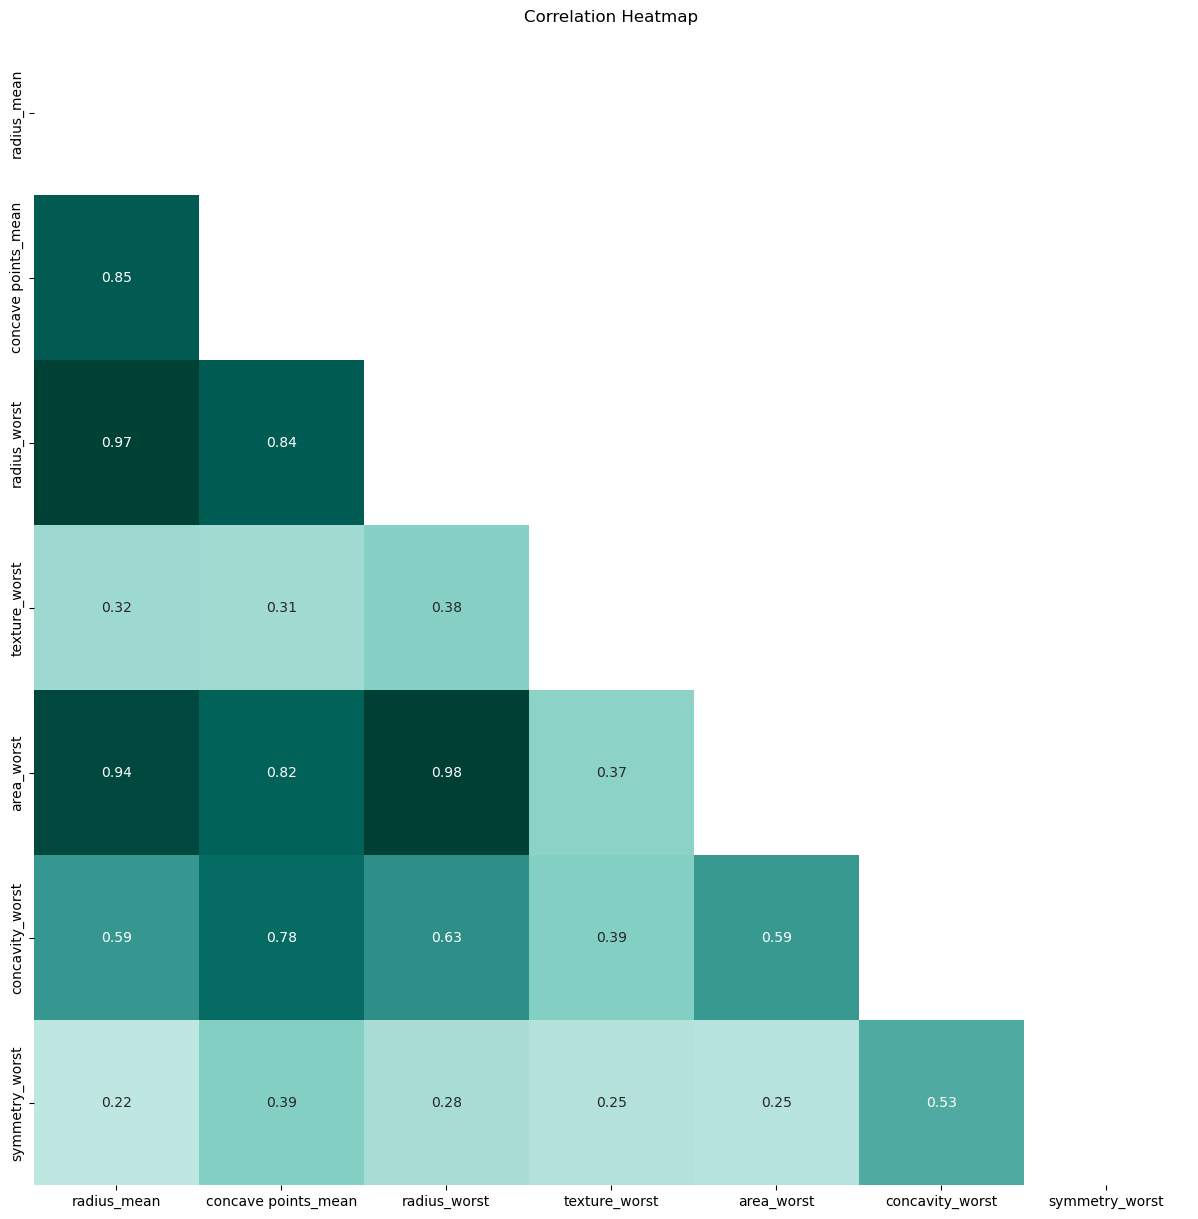

In [69]:
corr = X_train.corr()

plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap = "BrBG", 
            cbar=False, square=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Training the model with different ML algorithms

### Random forest

In [70]:
def train_rf_model(n_estimators, max_depth):
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        random_state=1
    )
    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 2)

    return (y_pred, # confusion matrix
            accuracy)

In [71]:
y_pred1, accuracy1 = train_rf_model(100, 15)
y_pred2, accuracy2 = train_rf_model(200, 5)
y_pred3, accuracy3 = train_rf_model(100, 3)
y_pred4, accuracy4 = train_rf_model(300, 3)

for i, accuracy in enumerate([accuracy1, accuracy2, accuracy3, accuracy4]):
    print(f'rf model {i+1} accuracy: {accuracy}')

rf model 1 accuracy: 0.96
rf model 2 accuracy: 0.96
rf model 3 accuracy: 0.96
rf model 4 accuracy: 0.96


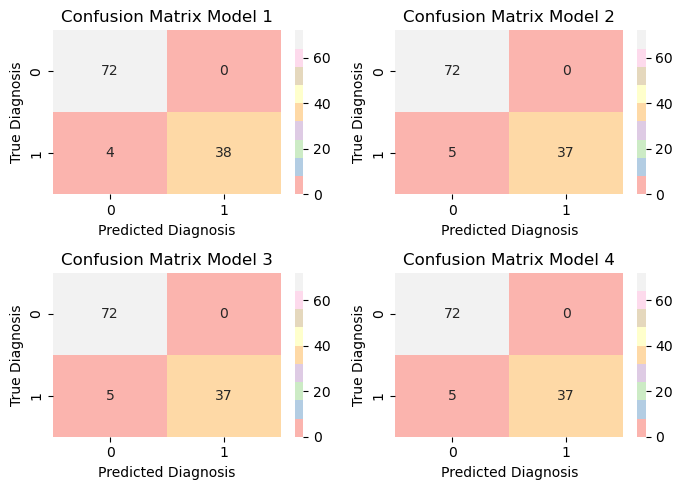

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

for i, y_pred in enumerate([y_pred1, y_pred2, y_pred3, y_pred4]):
    
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=True, cmap='Pastel1')
    ax.set_xlabel('Predicted Diagnosis')
    ax.set_ylabel('True Diagnosis')
    ax.set_title(f'Confusion Matrix Model {i+1}')

plt.tight_layout()
plt.show()

In [73]:
y_pred_list = [y_pred1, y_pred2, y_pred3, y_pred4]

for i, y_pred in enumerate(y_pred_list):
    print(f'Model {i+1} classification report')
    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------\n')

Model 1 classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

----------------------------------------------------------

Model 2 classification report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

----------------------------------------------------------

Model 3 classification report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00    

### XGBoost

In [74]:
def train_xgb_model(n_estimators, max_depth, learning_rate):
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        eval_metric = ["auc", "error"],
        random_state=1
    )

    xgb.fit(X_train, y_train, 
            eval_set = [(X_train, y_train), (X_test, y_test)],
            verbose=False)
    
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 2)

    return (xgb, # to plot auc curve, requires eval_metric parameter
            y_pred, # confusion matrix
            accuracy) 

In [75]:
xgb, y_pred, accuracy = train_xgb_model(100, 5, 0.01)

print(f'xgb accuracy = {accuracy}')

xgb accuracy = 0.89


xgb accuracy = 0.96



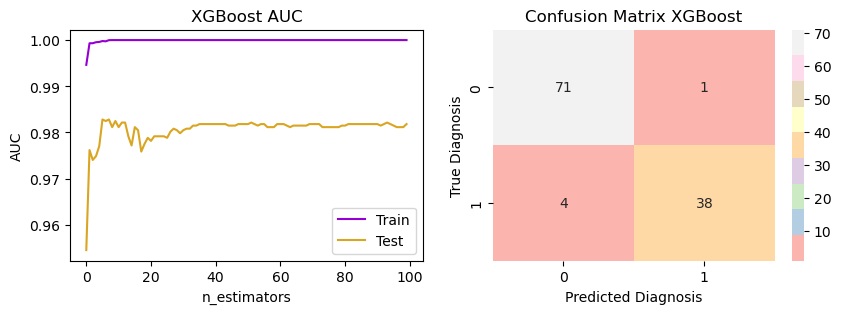

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [76]:
xgb, y_pred, accuracy = train_xgb_model(100, 5, 0.6)

print(f'xgb accuracy = {accuracy}\n')

# data visualization for the best results
cm = confusion_matrix(y_test, y_pred)

results = xgb.evals_result()
n_estimators = len(results['validation_0']['error'])
xticks = range(0, n_estimators)

fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplot(1,2,1)

plt.plot(xticks, results['validation_0']['auc'], label='Train', color='darkviolet')
plt.plot(xticks, results['validation_1']['auc'], label='Test', color='goldenrod')
axes[0].set_ylabel('AUC')
axes[0].set_xlabel('n_estimators')
axes[0].set_title('XGBoost AUC')
plt.legend()

plt.subplot(1,2,2)
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Pastel1', ax=axes[1])
axes[1].set_ylabel('True Diagnosis')
axes[1].set_xlabel('Predicted Diagnosis')
axes[1].set_title('Confusion Matrix XGBoost')
plt.show()

print(classification_report(y_test, y_pred))

### SVC

#### Linear, poly, radial, sigmoid

In [77]:
def train_svc_model(kernel):
    svc = SVC(kernel=kernel, random_state=1)
    
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 2)
    
    return y_pred, accuracy

In [78]:
y_pred1, accuracy1 = train_svc_model('linear')
y_pred2, accuracy2 = train_svc_model('poly')
y_pred3, accuracy3 = train_svc_model('rbf')
y_pred4, accuracy4 = train_svc_model('sigmoid')

for (accuracy, kernel) in zip([accuracy1, accuracy2, accuracy3, accuracy4],
                              ['linear', 'poly', 'radial', 'sigmoid']):
    print(f'svc {kernel} accuracy: {accuracy}')

svc linear accuracy: 0.96
svc poly accuracy: 0.86
svc radial accuracy: 0.95
svc sigmoid accuracy: 0.91


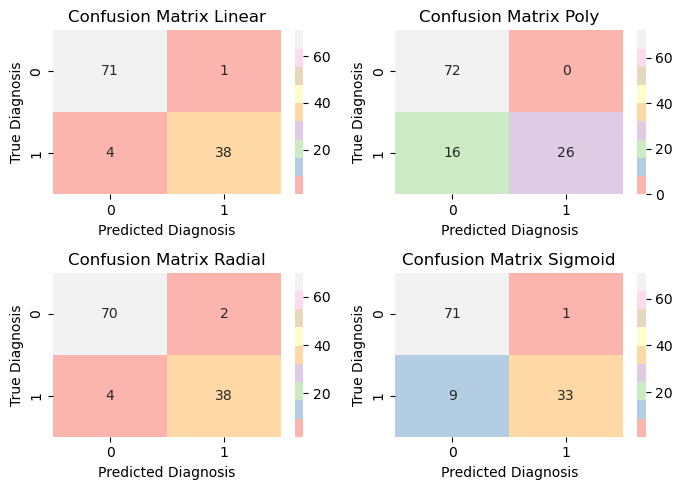

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

for i, (y_pred, kernel) in enumerate(zip([y_pred1, y_pred2, y_pred3, y_pred4],
                                         ['Linear', 'Poly', 'Radial', 'Sigmoid'])):
    
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=True, cmap='Pastel1')
    ax.set_xlabel('Predicted Diagnosis')
    ax.set_ylabel('True Diagnosis')
    ax.set_title(f'Confusion Matrix {kernel}')

plt.tight_layout()
plt.show()

In [80]:
y_pred_list = [y_pred1, y_pred2, y_pred3, y_pred4]
kernel = ['linear', 'poly', 'radial', 'sigmoid']

for (y_pred, name) in zip(y_pred_list, kernel):
    print(f'{name.capitalize()} classification report')
    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------\n')

Linear classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

----------------------------------------------------------

Poly classification report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        72
           1       1.00      0.62      0.76        42

    accuracy                           0.86       114
   macro avg       0.91      0.81      0.83       114
weighted avg       0.89      0.86      0.85       114

----------------------------------------------------------

Radial classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.9

### KNN

In [81]:
def train_knn_model(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 2)
    
    return y_pred, accuracy

In [82]:
for i in range(0, 10):
    y_pred, accuracy = train_knn_model(i+1)
    print(f'knn model {i+1} accuracy = {accuracy}')

knn model 1 accuracy = 0.92
knn model 2 accuracy = 0.88
knn model 3 accuracy = 0.91
knn model 4 accuracy = 0.93
knn model 5 accuracy = 0.94
knn model 6 accuracy = 0.94
knn model 7 accuracy = 0.93
knn model 8 accuracy = 0.93
knn model 9 accuracy = 0.91
knn model 10 accuracy = 0.91


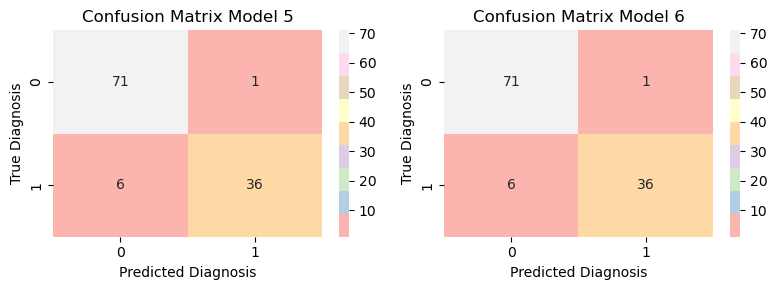

Model 5 classification report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

----------------------------------------------------------

Model 6 classification report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

----------------------------------------------------------



In [83]:
# confusion matrices and classification reports for the best performing k (i.e., k=5 and k=6)
y_pred5, accuracy5 = train_knn_model(5)
y_pred6, accuracy6 = train_knn_model(6)

y_pred_list = [y_pred5, y_pred6]

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

for i, y_pred in enumerate(y_pred_list):
    
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i // 1]
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=True, cmap='Pastel1')
    ax.set_xlabel('Predicted Diagnosis')
    ax.set_ylabel('True Diagnosis')
    ax.set_title(f'Confusion Matrix Model {i+5}')
    
plt.tight_layout()
plt.show()

for i, y_pred in enumerate(y_pred_list):
    print(f'Model {i+5} classification report')
    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------\n')

### Gaussian Naive Bayes

In [84]:
def train_gnb_model():
    gnb = GaussianNB()
    
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 2)
    
    return y_pred, accuracy

gnb model accuracy: 0.95


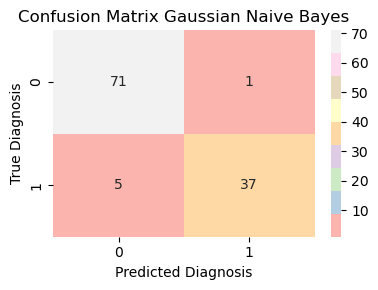

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [85]:
y_pred, accuracy = train_gnb_model()
print(f'gnb model accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='g', cbar=True, cmap='Pastel1')
plt.xlabel('Predicted Diagnosis')
plt.ylabel('True Diagnosis')
plt.title(f'Confusion Matrix Gaussian Naive Bayes')
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred))

# Training the model with different deep learning neural networks

### Split the test data from above into validation and test sets:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)`

In [86]:
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [87]:
R, C = X_train.shape

### Create some functions.

**Details on the parameters**:

- `NN_random_state`: 
  - default seed value of 100.
- `compile_fit`
  - model architecture `nn` 
  - learning rate value `learning_rate`.
- `visualize_nn_results` 
  - model architecture `nn`
  - output `nn_fit` from the function `compile_fit`
  - string (name of the neural network) to label the plots accordingly.
  
**Note**: All neural networks are run on `epochs=5` and `batch_size=32` since the dataset isn't extremely large.

In [88]:
def random_state(seed_value=100):
    
    tf.random.set_seed(seed_value)
    np.random.seed(seed_value)
    random.seed(seed_value)

In [89]:
def compile_fit(learning_rate, nn):
    
    # select Adam optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # compile model
    nn.compile(optimizer = optimizer, 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
    
    # fit model
    nn_fit = nn.fit(X_train, y_train, 
                      validation_data = (X_validation, y_validation), 
                      epochs = 5, batch_size=32, verbose=False)

    # evaluate model train accuracy
    train_loss, train_acc = nn.evaluate(X_train, y_train)
    print(f'Training loss: {train_loss}')
    print(f'Training accuracy: {train_acc}')
    
    # evaluate model test accuracy
    print('\n')
    test_loss, test_acc = nn.evaluate(X_test, y_test)
    print(f'Testing loss: {test_loss}')
    print(f'Testing accuracy: {test_acc}')
    
    return nn_fit

In [90]:
def visualize_nn_results(nn, nn_fit, nn_string_name):
    
    # visualize loss, accuracy, and confusion matrix
    fig, axes = plt.subplots(1,3, figsize=(10,3))


    plt.subplot(1,3,1)
    plt.plot(nn_fit.history['loss'], label='loss', color='cornflowerblue')
    plt.plot(nn_fit.history['val_loss'], label='val_loss', color='orangered')
    axes[0].set_xlabel('epochs')
    axes[0].set_ylabel('loss')
    axes[0].set_title(f'{nn_string_name} Loss vs. Val_loss')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(nn_fit.history['accuracy'], label='accuracy', color='darkviolet')
    plt.plot(nn_fit.history['val_accuracy'], label='val_accuracy', color='goldenrod')
    axes[1].set_xlabel('epochs')
    axes[1].set_ylabel('accuracy')
    axes[1].set_title(f'{nn_string_name} Accuracy vs. Val_accuracy')
    plt.legend()
    
    # confusion matrix
    y_pred = nn.predict(X_test).flatten()

    # malignant=1 if probability of y_pred > 0.5, else benign=0
    y_pred = np.where(y_pred > 0.5, 1, 0)

    plt.subplot(1,3,3)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[2])
    axes[2].set_xlabel('Predicted Diagnosis')
    axes[2].set_ylabel('True Diagnosis')
    axes[2].set_title(f'Confusion Matrix {nn_string_name}')
    
    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, y_pred))

### ANN

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9597 - loss: 0.0994 
Training loss: 0.07510220259428024
Training accuracy: 0.9736263751983643


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9441 - loss: 0.1264  
Testing loss: 0.1217220202088356
Testing accuracy: 0.9473684430122375
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


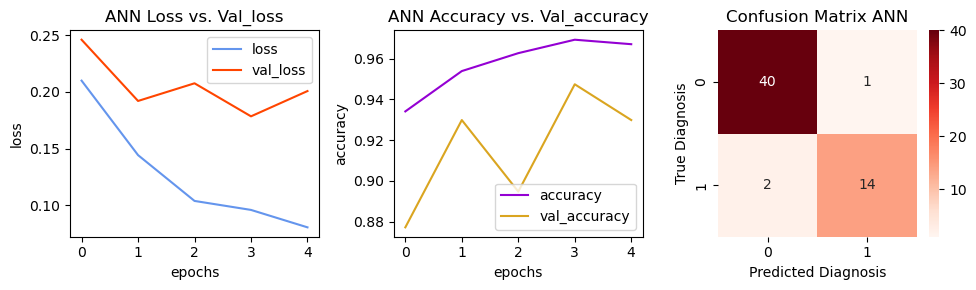

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.93      0.88      0.90        16

    accuracy                           0.95        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.95      0.95      0.95        57



In [91]:
random_state()

# build the model
ann = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (C,)), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_fit = compile_fit(0.04, ann)

visualize_nn_results(ann, ann_fit, 'ANN')

### RNN  - LSTM

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9403 - loss: 0.1803 
Training loss: 0.12900808453559875
Training accuracy: 0.9560439586639404


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9324 - loss: 0.2255 
Testing loss: 0.22465968132019043
Testing accuracy: 0.9298245906829834
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step


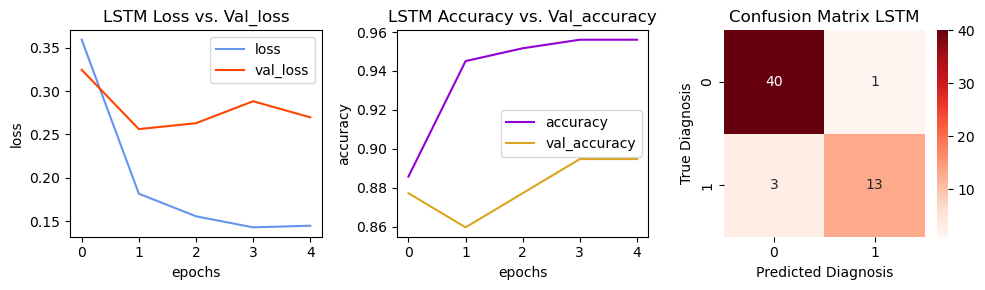

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.93      0.81      0.87        16

    accuracy                           0.93        57
   macro avg       0.93      0.89      0.91        57
weighted avg       0.93      0.93      0.93        57



In [92]:
random_state()

# build the model 
lstm = tf.keras.models.Sequential([ 
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1)),  
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_fit = compile_fit(0.02, lstm)

visualize_nn_results(lstm, lstm_fit, 'LSTM')

### RNN - GRU

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9551 - loss: 0.1293
Training loss: 0.09360726177692413
Training accuracy: 0.9692307710647583


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9324 - loss: 0.1625  
Testing loss: 0.15946589410305023
Testing accuracy: 0.9298245906829834
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step


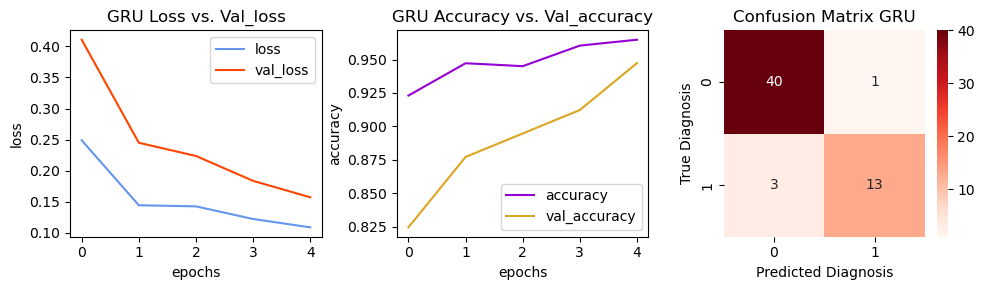

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.93      0.81      0.87        16

    accuracy                           0.93        57
   macro avg       0.93      0.89      0.91        57
weighted avg       0.93      0.93      0.93        57



In [93]:
random_state()

gru = tf.keras.models.Sequential([ 
    tf.keras.layers.GRU(64, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

gru_fit = compile_fit(0.035, gru)

visualize_nn_results(gru, gru_fit, 'GRU')

## CNN

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9259 - loss: 0.2360 
Training loss: 0.17922866344451904
Training accuracy: 0.9406593441963196


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9441 - loss: 0.2075  
Testing loss: 0.18843701481819153
Testing accuracy: 0.9473684430122375
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


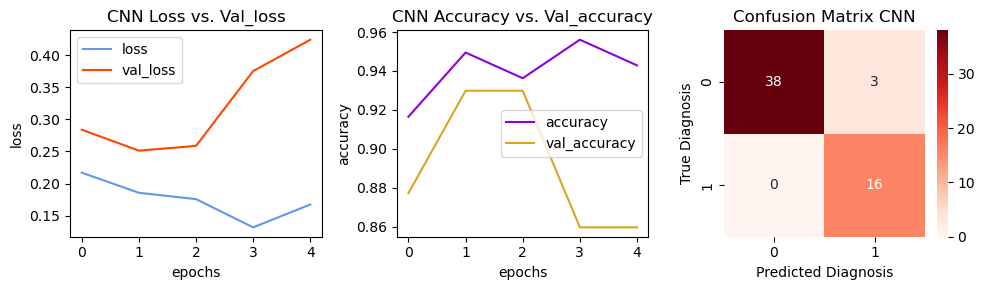

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.84      1.00      0.91        16

    accuracy                           0.95        57
   macro avg       0.92      0.96      0.94        57
weighted avg       0.96      0.95      0.95        57



In [94]:
random_state()

cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_fit = compile_fit(0.1, cnn)

visualize_nn_results(cnn, cnn_fit, 'CNN')